**YOUR NAME HERE**

CS 251/2: Data Analysis and Visualization

Spring 2024

### Reminder: AI Policy

To improve the quality of your learning and out of fairness to your hardworking classmates, AI (e.g. ChatGPT, Copilot, etc.) should NOT be used in ANY way on this project and extensions. This includes both written analysis, plotting, and code. I will only grade your work, not an AI's. I will stop grading your project if I notice AI-generated content (in any capacity).

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import analysis

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Project 6 | Supervised Learning

## Task 1: K Nearest Neighbors (KNN) Classifier

To start off the project, you will implement the **KNN classifier**, a bedrock, highly-versatile, nonparametric (i.e. *memory-based*) supervised learning algorithm. You will test out and experiment with KNN on a **multi-class spiral 2D dataset**.

### 1a. Load and visualize spiral data

1. Below, load in both spiral datasets 1 (`spiral_train_1.csv`, `spiral_val_1.csv`) and 2 (`spiral_train_2.csv`, `spiral_val_2.csv`). Each training set has 4,000 samples and each validation set has 1,200 samples (*there is no test set for this development dataset*).
2. Create a 2x2 grid plot showing the train and validation data side-by-side in each version of the dataset.
    - Be sure to label your subplots with informative titles (which dataset are we looking at?).
    - Color-code the points based on their class.
    - Set the figure size to make everything clearly legible (not microscopic).
3. Convert your datasets from pandas to ndarray format.
4. For this dataset, the labels are a column in the CSV files. Before moving on, create separate arrays to store the training and validation labels. Remove the labels from your train and test dataset arrays (i.e. they should be `(N, 2)`).

#### Format of spiral data

- Column 1: x coordinate of a 2D point (on a spiral).
- Column 2: y coordinate of a 2D point (on a spiral).
- Column 3: class. Which spiral arm does the point belong to? Labels: [0, 1, 2, 3]

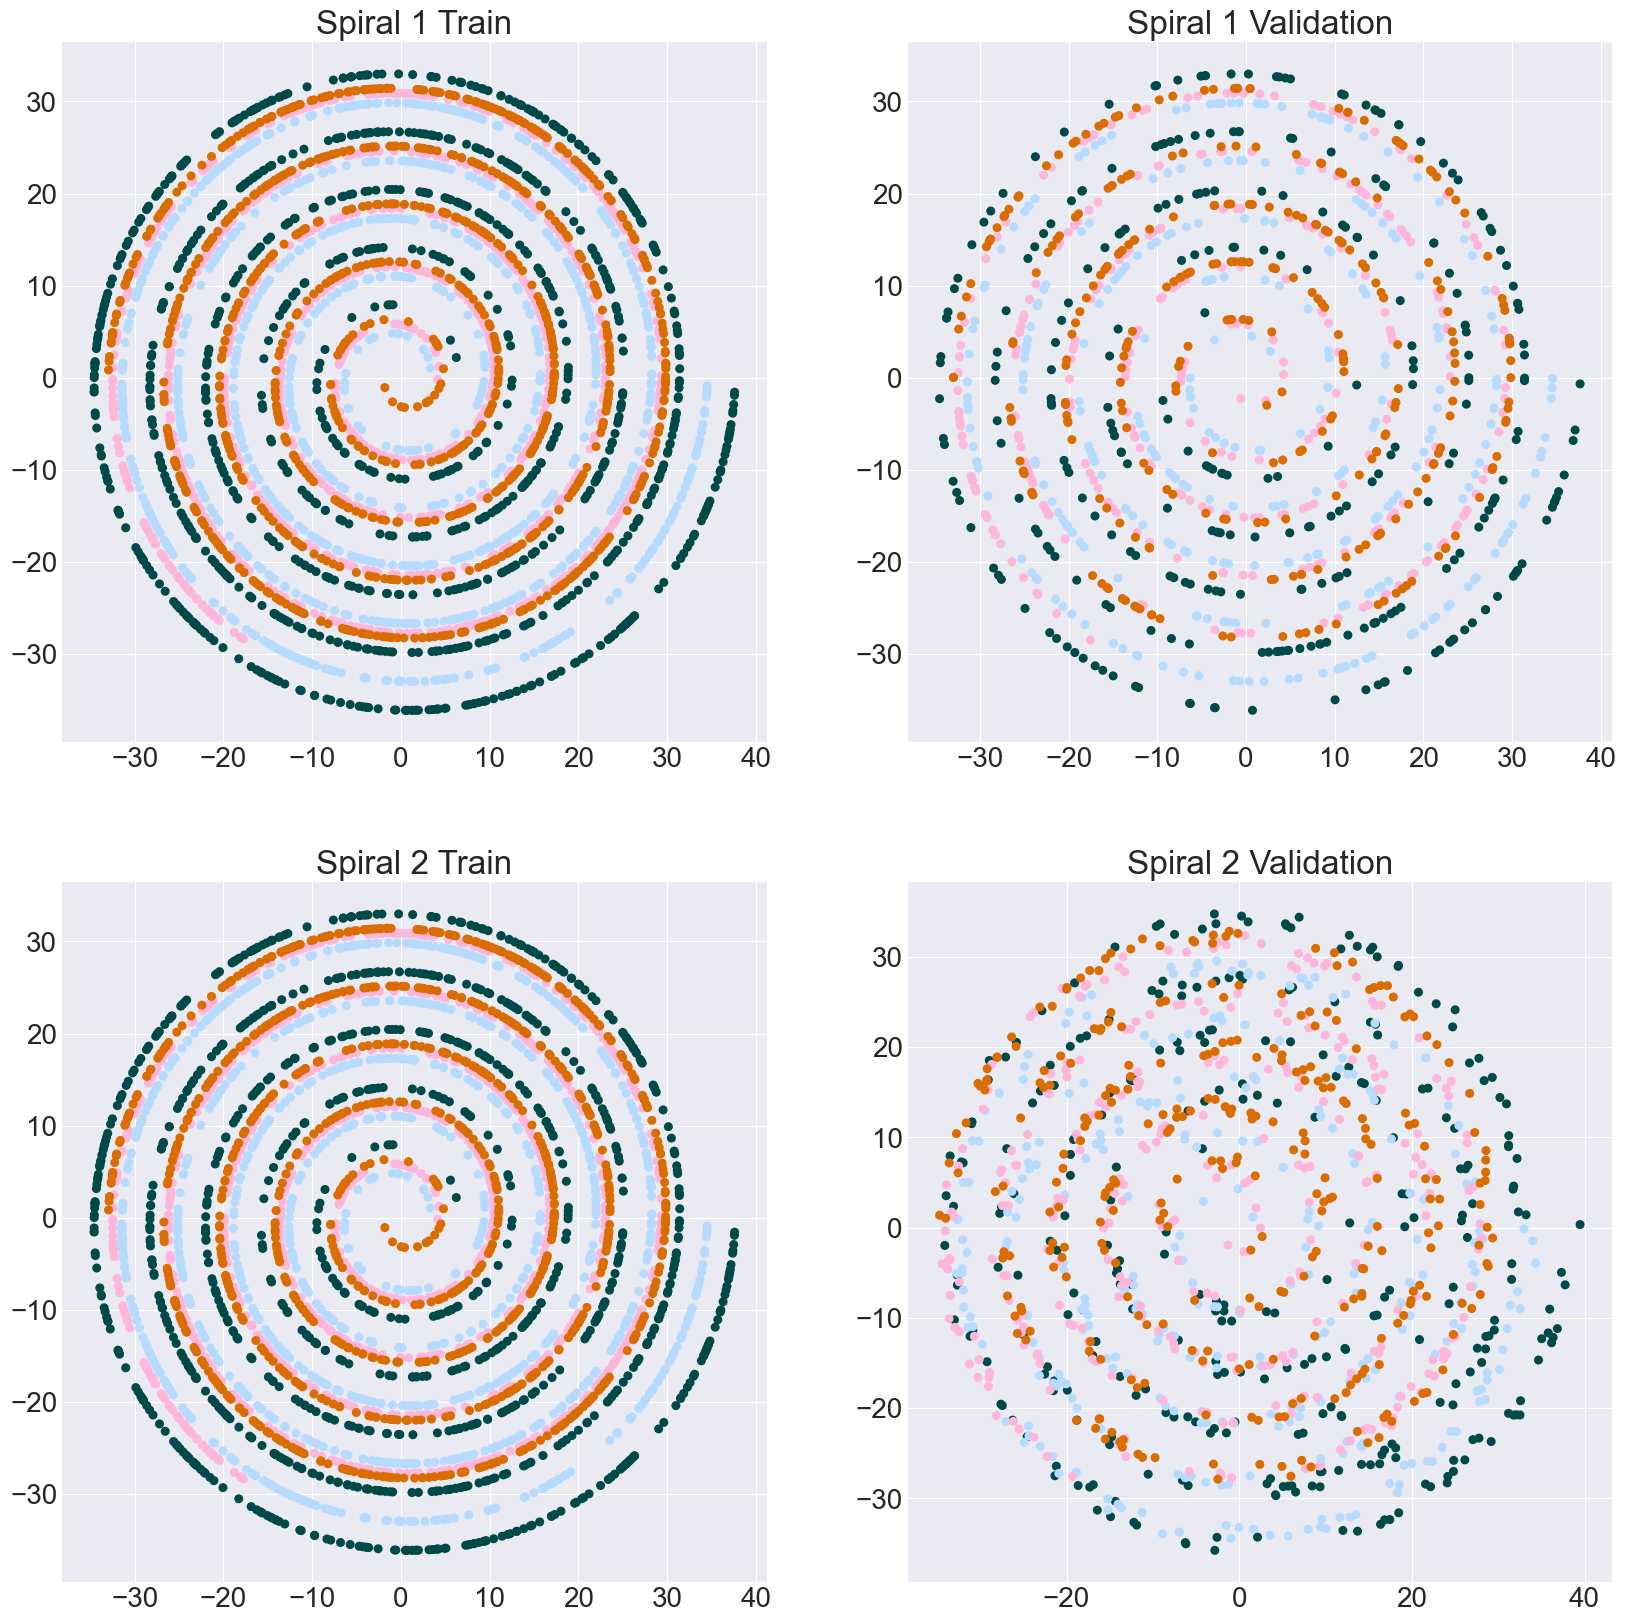

Spiral 1 train (4000, 2), classes (4000,)
Spiral 1 validation (1200, 2), classes (1200,)
Spiral 2 train (4000, 2), classes (4000,)
Spiral 2 validation (1200, 2), classes (1200,)

Spiral 1 train data in ndarray format? True
Spiral 1 train class in ndarray format? True
Spiral 1 validation data in ndarray format? True
Spiral 1 validation class in ndarray format? True
Spiral 2 train data in ndarray format? True
Spiral 2 train class in ndarray format? True
Spiral 2 validation data in ndarray format? True
Spiral 2 validation class in ndarray format? True


In [76]:
from matplotlib.colors import ListedColormap

# Custom Color Maps
colors = ["#004949", "#FF6DB6", "#490092", "#B66DFF", "#B6DBFF", "#924900", "#24FF24", 
          "#009292", "#FFB6DB", "#006DDB", "#6DB6FF", "#920000", "#DB6D00", "#FFFF6D"]
light_colors = colors[::2]
dark_colors = list(map(lambda x: "#"+"".join(map(lambda col: ("0x%0.2X" % int((255 + int(col, 16))/2))[2:], [x[1][1 + 2*i : 3 + 2*i] for i in range(3)])), enumerate(light_colors)))
custom_cmap_light = ListedColormap(light_colors)
custom_cmap_dark = ListedColormap(dark_colors)

# Load spiral data
spiral_1_train = pd.read_csv('data/spiral_train_1.csv').to_numpy()
spiral_1_val = pd.read_csv('data/spiral_val_1.csv').to_numpy()
spiral_2_train = pd.read_csv('data/spiral_train_2.csv').to_numpy()
spiral_2_val = pd.read_csv('data/spiral_val_2.csv').to_numpy()

# Separate labels from data
spiral_1_train_y = spiral_1_train[:, 2]
spiral_1_val_y = spiral_1_val[:, 2]
spiral_2_train_y = spiral_2_train[:, 2]
spiral_2_val_y = spiral_2_val[:, 2]

# Remove labels from data
spiral_1_train = spiral_1_train[:, :2]
spiral_1_val = spiral_1_val[:, :2]
spiral_2_train = spiral_2_train[:, :2]
spiral_2_val = spiral_2_val[:, :2]

# Visualize spiral data
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Spiral 1
axs[0, 0].scatter(spiral_1_train[:, 0], spiral_1_train[:, 1], c=spiral_1_train_y, cmap=custom_cmap_light, s=30)
axs[0, 0].set_title('Spiral 1 Train')
axs[0, 1].scatter(spiral_1_val[:, 0], spiral_1_val[:, 1], c=spiral_1_val_y, cmap=custom_cmap_light, s=30)
axs[0, 1].set_title('Spiral 1 Validation')

# Spiral 2
axs[1, 0].scatter(spiral_2_train[:, 0], spiral_2_train[:, 1], c=spiral_2_train_y, cmap=custom_cmap_light, s=30)
axs[1, 0].set_title('Spiral 2 Train')
axs[1, 1].scatter(spiral_2_val[:, 0], spiral_2_val[:, 1], c=spiral_2_val_y, cmap=custom_cmap_light, s=30)
axs[1, 1].set_title('Spiral 2 Validation')

plt.show()



print(f'Spiral 1 train {spiral_1_train.shape}, classes {spiral_1_train_y.shape}')
print(f'Spiral 1 validation {spiral_1_val.shape}, classes {spiral_1_val_y.shape}')
print(f'Spiral 2 train {spiral_2_train.shape}, classes {spiral_2_train_y.shape}')
print(f'Spiral 2 validation {spiral_2_val.shape}, classes {spiral_2_val_y.shape}')
print()

print(f'Spiral 1 train data in ndarray format? {isinstance(spiral_1_train, np.ndarray)}')
print(f'Spiral 1 train class in ndarray format? {isinstance(spiral_1_train_y, np.ndarray)}')
print(f'Spiral 1 validation data in ndarray format? {isinstance(spiral_1_val, np.ndarray)}')
print(f'Spiral 1 validation class in ndarray format? {isinstance(spiral_1_val_y, np.ndarray)}')
print(f'Spiral 2 train data in ndarray format? {isinstance(spiral_2_train, np.ndarray)}')
print(f'Spiral 2 train class in ndarray format? {isinstance(spiral_2_train_y, np.ndarray)}')
print(f'Spiral 2 validation data in ndarray format? {isinstance(spiral_2_val, np.ndarray)}')
print(f'Spiral 2 validation class in ndarray format? {isinstance(spiral_2_val_y, np.ndarray)}')

### 1b. Implement KNN


Implement the following methods of `Classifier` in `classifier.py`, which will be the parent class to the `KNN` classifier.
- Constructor
- `accuracy(y, y_pred)`: Compute percent correct given true data class labels `y` and algorithm predicted class labels `y_pred`. 

Implement the following methods of `KNN` in `knn.py`. 
- Constructor
- `train(data, y)`: Train the KNN classifier on the data `data`, where training samples have corresponding class labels in `y`.
- `predict(data, k)`: Use the trained KNN classifier to predict the class label of each test sample in `data`. Determine class by voting: find the closest `k` training exemplars (training samples) and the class is the majority vote of the classes of these training exemplars.

Test relevant methods using the test code below.

In [77]:
from knn import KNN

#### Test: Accuracy

In [78]:
np.random.seed(0)
test_y = np.random.randint(low=0, high=11, size=(50,))
test_y_pred = np.random.randint(low=0, high=11, size=(50,))
classifier = KNN(num_classes=0)
acc = classifier.accuracy(test_y, test_y_pred)
print(f'Test accuracy is {acc} and should be 0.06.')

Test accuracy is 0.06 and should be 0.06.


#### Test: 1-NN

In [79]:
n_classes = 4
classifier = KNN(num_classes=n_classes)
classifier.train(spiral_1_train, spiral_1_train_y)

k = 1
spiral_1_y_pred = classifier.predict(spiral_1_train, k)
print(f'Your predicted class of the first 10 training samples is\n{spiral_1_y_pred[:10]}')
acc = classifier.accuracy(y=spiral_1_train_y, y_pred=spiral_1_y_pred)
print(f'Your accuracy with K=1 is {acc} and should be 1.0')

Your predicted class of the first 10 training samples is
[0 0 0 0 0 0 0 0 0 0]
Your accuracy with K=1 is 1.0 and should be 1.0


#### Test 2-NN

*Note: The below test code assumes that you resolve voting ties with the class that has a lower index. There is a numpy function that you may feel inclined to use (or not!) that handles this automatically.*

In [80]:
n_classes = 4
classifier = KNN(num_classes=n_classes)
classifier.train(spiral_1_train, spiral_1_train_y)

k = 2
spiral_1_y_pred = classifier.predict(spiral_1_val, k)
acc = classifier.accuracy(y=spiral_1_val_y, y_pred=spiral_1_y_pred)
print(f'Your accuracy with K=2 is {acc:.2f} and should be 0.88')

true_test_y = np.array([2., 2., 2., 2., 2., 3., 2., 2., 3., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 3., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 3., 2., 2.,
       2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 3., 3., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 3., 2., 2., 2., 3., 3., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

print(f'The mismatches between your predicted class of validation samples with indices 750-900 and the expected values are\n{np.where(true_test_y != spiral_1_y_pred[750:900], 1, 0)}')
print('Seeing all 0s means everything seems to be working great!')

Your accuracy with K=2 is 0.88 and should be 0.88
The mismatches between your predicted class of validation samples with indices 750-900 and the expected values are
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Seeing all 0s means everything seems to be working great!


### 1c. Questions

**Question 1:** Explain why in the above 1-NN test, the accuracy must be 100%.

**Answer 1:** This is because this is precisely the training data and as such the 1st nearest neighbor will always be the point itself.

### 1d. Find the best `k`

- Below, "script" your `predict` method on both spiral datasets 1 and 2. Compute the accuracy on the respective test sets with many different values of `k`.
- Create two well-labeled plots, one for each spiral dataset, showing the accuracy for many different `k` values.

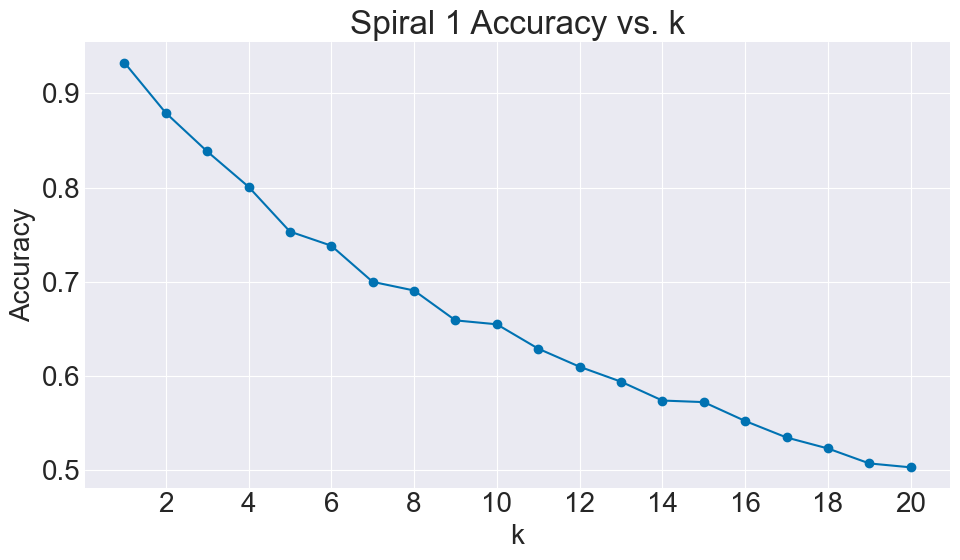

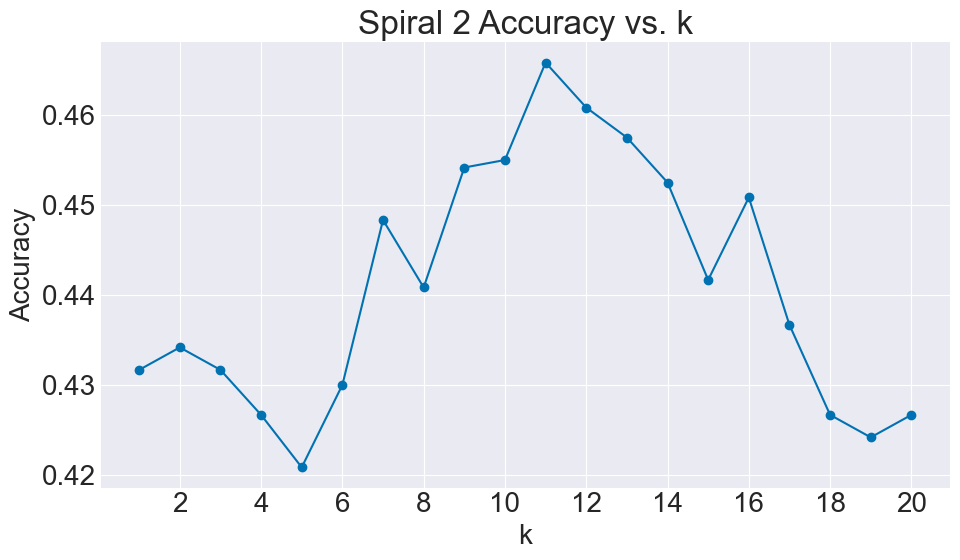

In [81]:
# Spiral 1
spiral_1_ks = np.arange(1, 21)
spiral_1_accs = []
for k in spiral_1_ks:
    classifier = KNN(num_classes=4)
    classifier.train(spiral_1_train, spiral_1_train_y)
    spiral_1_y_pred = classifier.predict(spiral_1_val, k)
    acc = classifier.accuracy(y=spiral_1_val_y, y_pred=spiral_1_y_pred)
    spiral_1_accs.append(acc)
    
plt.figure(figsize=(10, 6))
plt.plot(spiral_1_ks, spiral_1_accs, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Spiral 1 Accuracy vs. k')
plt.xticks(spiral_1_ks[:20:2], minor=True)
plt.xticks(spiral_1_ks[1:21:2], minor=False)
plt.grid(True)
plt.tight_layout()
plt.show()

# Spiral 2
spiral_2_ks = np.arange(1, 21)
spiral_2_accs = []
for k in spiral_2_ks:
    classifier = KNN(num_classes=4)
    classifier.train(spiral_2_train, spiral_2_train_y)
    spiral_2_y_pred = classifier.predict(spiral_2_val, k)
    acc = classifier.accuracy(y=spiral_2_val_y, y_pred=spiral_2_y_pred)
    spiral_2_accs.append(acc)
    
plt.figure(figsize=(10, 6))
plt.plot(spiral_2_ks, spiral_2_accs, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Spiral 2 Accuracy vs. k')
plt.xticks(spiral_2_ks[:20:2], minor=True)
plt.xticks(spiral_2_ks[1:21:2], minor=False)
plt.grid(True)
plt.tight_layout()
plt.show()


p = 1


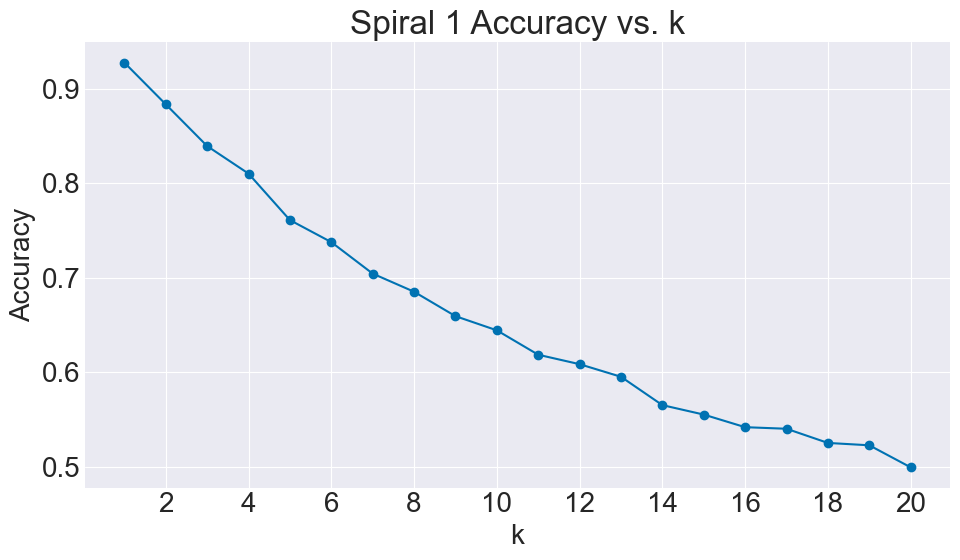

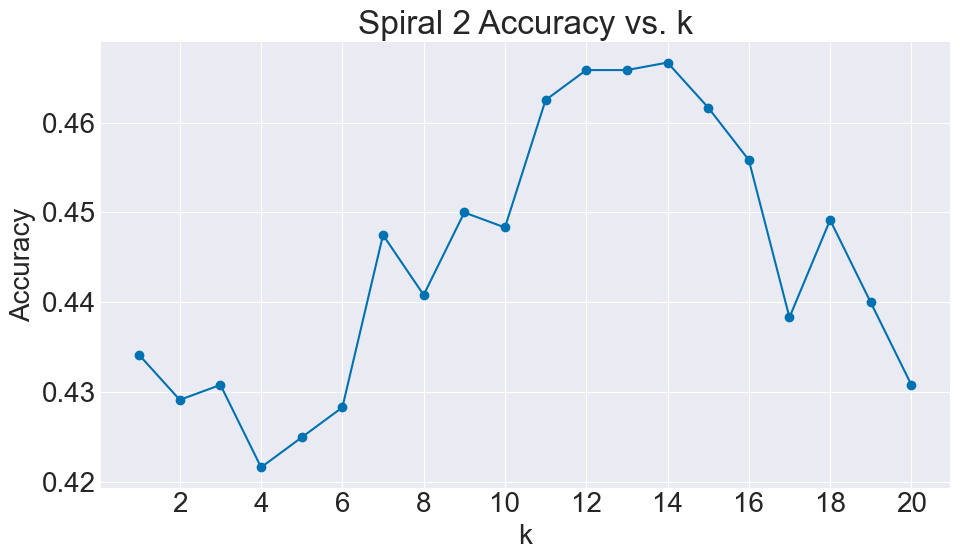

p = 2


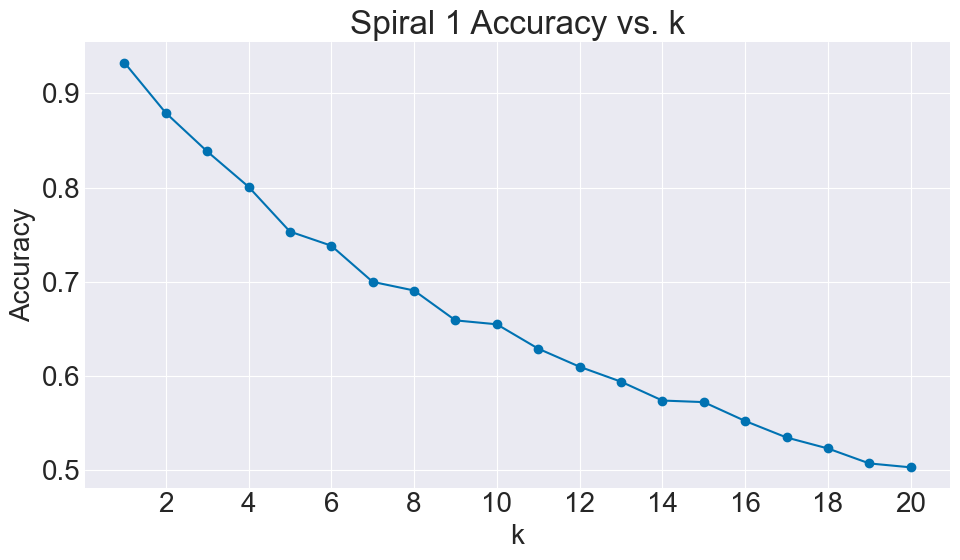

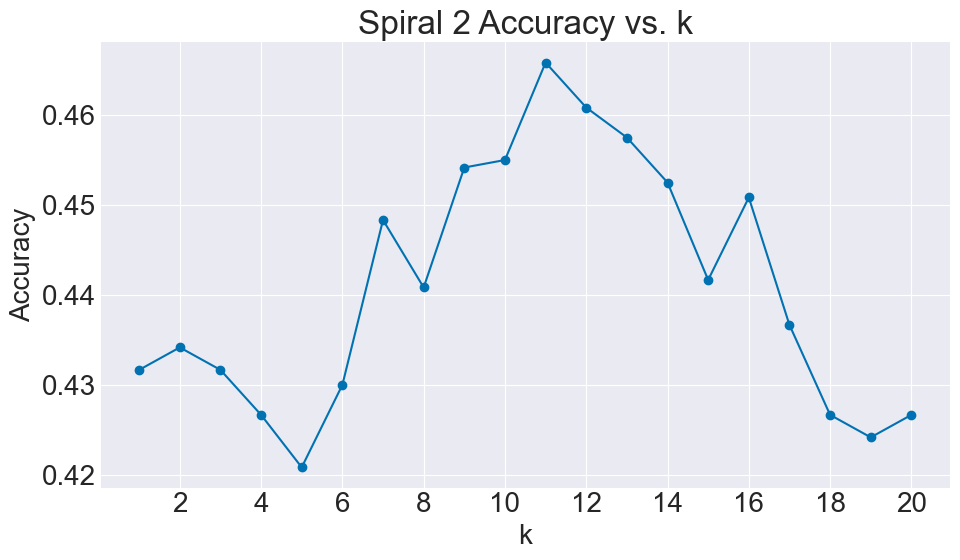

p = 3


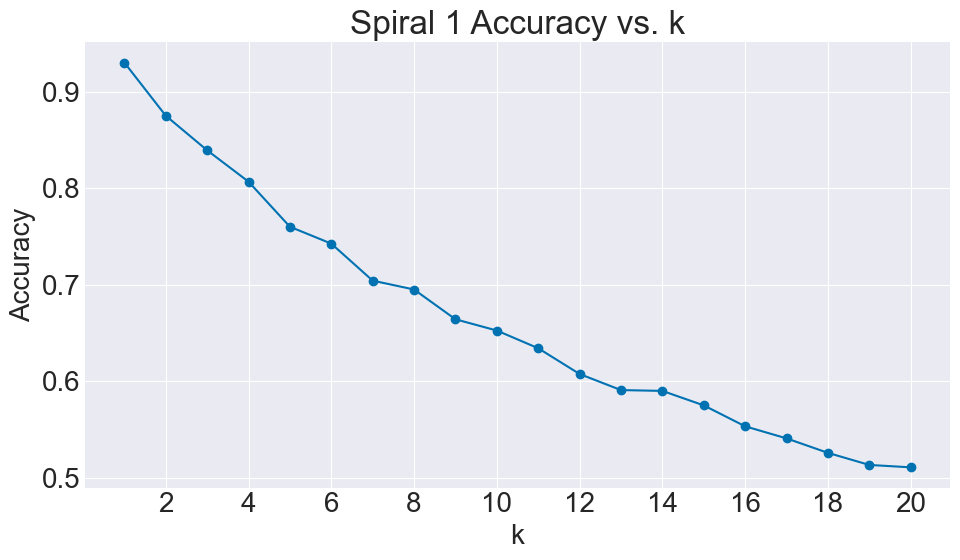

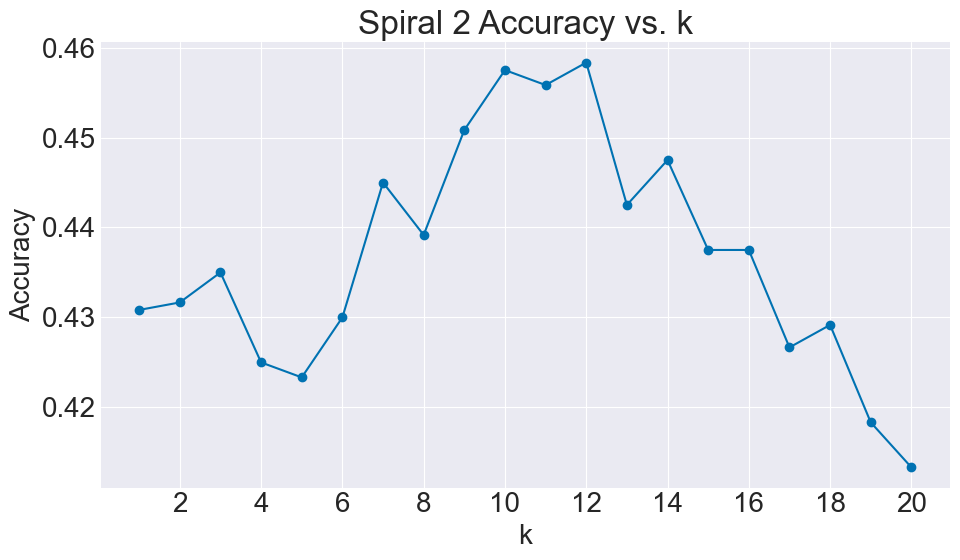

p = 4


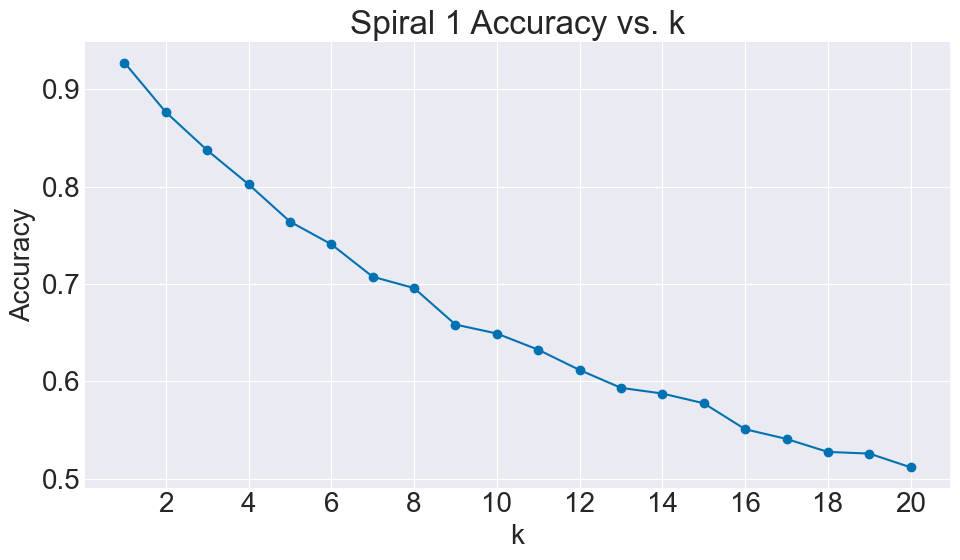

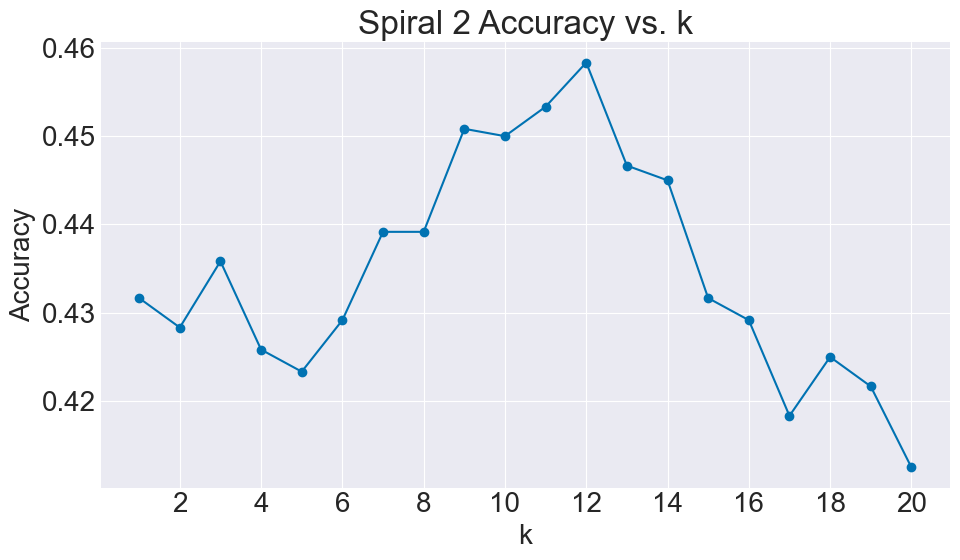

In [82]:
from analysis import Analysis

for p in range(1, 6):
    print(f'p = {p}')
    if p == 5:
        p = np.inf
    # Spiral 1
    spiral_1_ks = np.arange(1, 21)
    spiral_1_accs = []
    for k in spiral_1_ks:
        classifier = KNN(num_classes=4)
        classifier.train(spiral_1_train, spiral_1_train_y)
        spiral_1_y_pred = classifier.predict_mod(spiral_1_val, k, Analysis.lp_norm, p)
        acc = classifier.accuracy(y=spiral_1_val_y, y_pred=spiral_1_y_pred)
        spiral_1_accs.append(acc)
        
    plt.figure(figsize=(10, 6))
    plt.plot(spiral_1_ks, spiral_1_accs, marker='o')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('Spiral 1 Accuracy vs. k')
    plt.xticks(spiral_1_ks[:20:2], minor=True)
    plt.xticks(spiral_1_ks[1:21:2], minor=False)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Spiral 2
    spiral_2_ks = np.arange(1, 21)
    spiral_2_accs = []
    for k in spiral_2_ks:
        classifier = KNN(num_classes=4)
        classifier.train(spiral_2_train, spiral_2_train_y)
        spiral_2_y_pred = classifier.predict_mod(spiral_2_val, k, Analysis.lp_norm, p)
        acc = classifier.accuracy(y=spiral_2_val_y, y_pred=spiral_2_y_pred)
        spiral_2_accs.append(acc)
        
    plt.figure(figsize=(10, 6))
    plt.plot(spiral_2_ks, spiral_2_accs, marker='o')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('Spiral 2 Accuracy vs. k')
    plt.xticks(spiral_2_ks[:20:2], minor=True)
    plt.xticks(spiral_2_ks[1:21:2], minor=False)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

p = 1.0


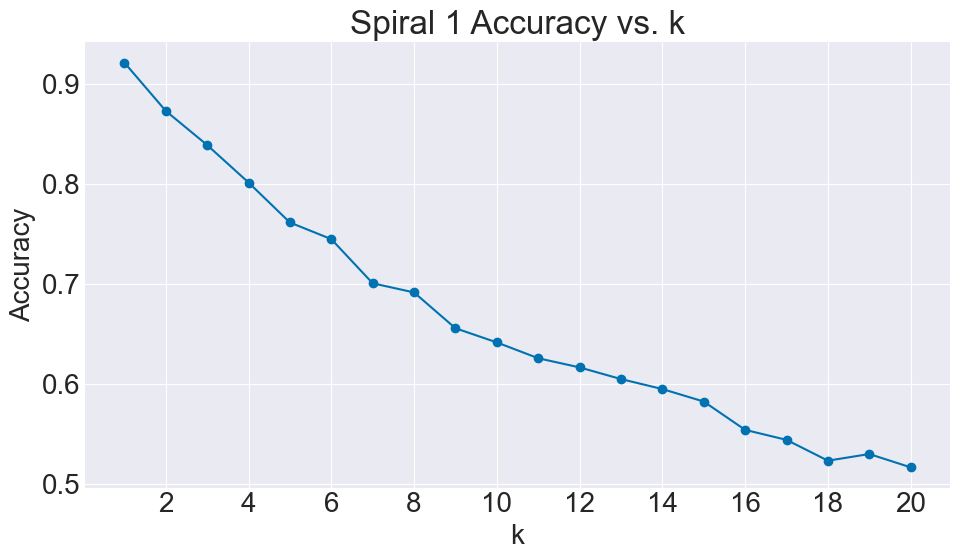

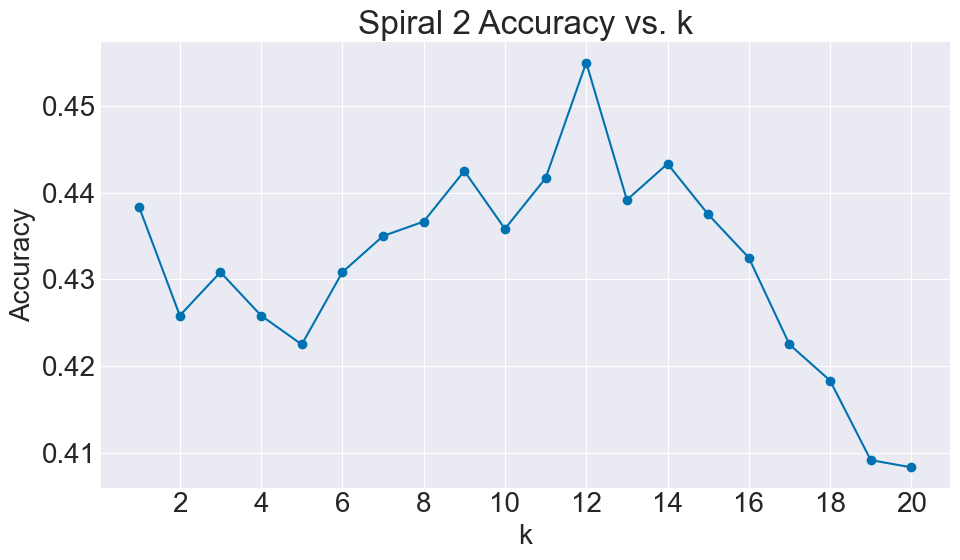

p = 0.5


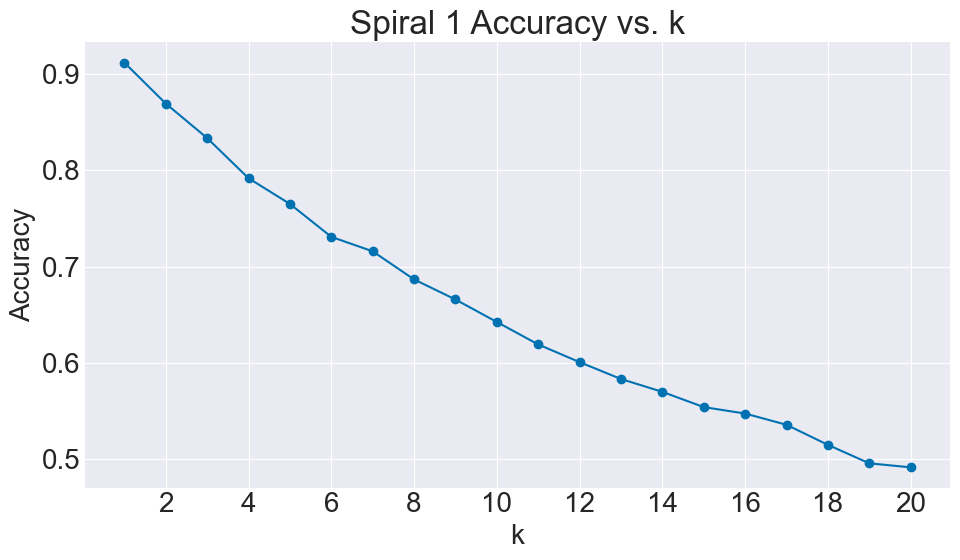

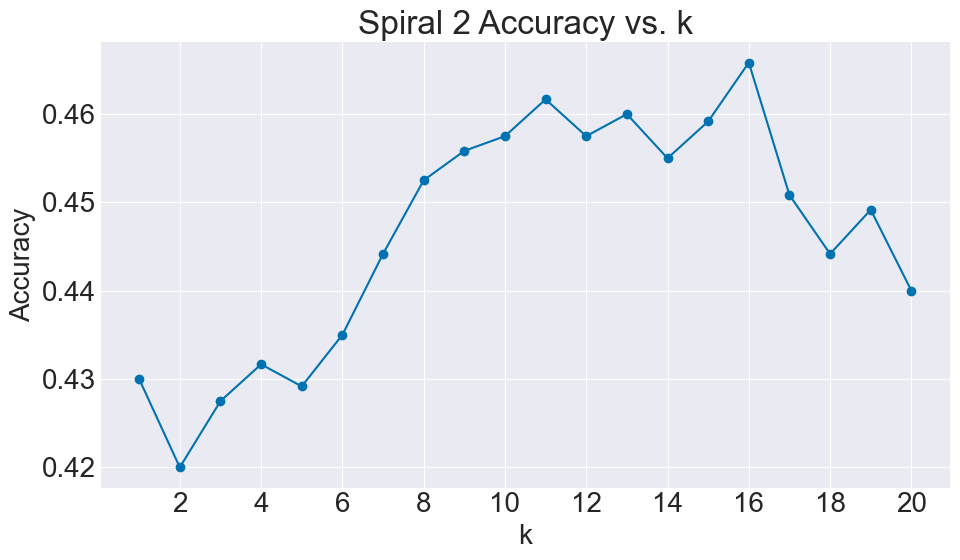

In [88]:
from analysis import Analysis

for p in range(1, 3):
    print(f'p = {float(1 / p)}')
    if p == 1:
        p = np.inf
    else:
        p = float(1 / float(p))
    # Spiral 1
    spiral_1_ks = np.arange(1, 21)
    spiral_1_accs = []
    for k in spiral_1_ks:
        classifier = KNN(num_classes=4)
        classifier.train(spiral_1_train, spiral_1_train_y)
        spiral_1_y_pred = classifier.predict_mod(spiral_1_val, k, Analysis.lp_norm, p)
        acc = classifier.accuracy(y=spiral_1_val_y, y_pred=spiral_1_y_pred)
        spiral_1_accs.append(acc)
        
    plt.figure(figsize=(10, 6))
    plt.plot(spiral_1_ks, spiral_1_accs, marker='o')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('Spiral 1 Accuracy vs. k')
    plt.xticks(spiral_1_ks[:20:2], minor=True)
    plt.xticks(spiral_1_ks[1:21:2], minor=False)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Spiral 2
    spiral_2_ks = np.arange(1, 21)
    spiral_2_accs = []
    for k in spiral_2_ks:
        classifier = KNN(num_classes=4)
        classifier.train(spiral_2_train, spiral_2_train_y)
        spiral_2_y_pred = classifier.predict_mod(spiral_2_val, k, Analysis.lp_norm, p)
        acc = classifier.accuracy(y=spiral_2_val_y, y_pred=spiral_2_y_pred)
        spiral_2_accs.append(acc)
        
    plt.figure(figsize=(10, 6))
    plt.plot(spiral_2_ks, spiral_2_accs, marker='o')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('Spiral 2 Accuracy vs. k')
    plt.xticks(spiral_2_ks[:20:2], minor=True)
    plt.xticks(spiral_2_ks[1:21:2], minor=False)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### 1e. Questions

**Question 2:** What is the `k` that results in the highest accuracy on each spiral dataset?

**Question 3:** Why are the accuracies are so different across the datasets? (*Hint: look at the data*)

**Question 4:** Why are the best `k` values are so different across the datasets?

**Question 5:** Is it a good idea to always set `k` to one of these values when working with another dataset?

**Answer 2:** 1 and 11 respectively.

**Answer 3:** The data in the second spiral dataset is considerably more sparse and noisy as such distance to classifiers is more likely to include other points. All things considered pretty predictable though.

**Answer 4:** Again, the data is more sparse and noisy in the second spiral dataset, as such the best k value is likely to be higher because a larger sample of points is taken. If there exists a clearly defined region corresponding with one set of points. A larger sample of said set is less likely to contain points from other sets.

**Answer 5:** No, the correct choice of k is highly dependent on the dataset and parameters at play. It highly depends on the dataset and these factors, as such it would be foolish to make such bold claims. More so considering that metric choice and solution space toplogy can also play a role in the optimal k value. For instance, please note all values of p for lp norms I made calculations for.

**LP Norms:**
The above graphs correspond with the minkowski metrics for p = 1, 2, 3, 4, $\infty$, $\frac{1}{2}$, $\frac{1}{2}$, and $\frac{1}{3}$. Note that the size of each of these metrics follows some rules. For 0<p<1 the metric is not atechnically a metric as the functions are concaver and as such the distance between any two points via this metric is greater than the straight line distance. For p = 1 the metric is the manhattan distance, for p = 2 the metric is the euclidean distance, and for p = $\infty$ the metric is the chebyshev distance. In any case for 0<p<1 the distance between two points gets greater as p goes to zero (save for certain points) whereas with 1<p<$\infty$ the distance between two points gets smaller as p goes to $\infty$ (same as with 0<p<1), but this is true for all points by the triangle inequality as the space is concave vs convex with 0<p<1. For p=1 it is neither concave or convex. What this means though is that evern with general metrics such as these the optimal k value can change, not to mention for more complex Riemannian manifold s with more complex metrics.

### 1f. Visualize class boundaries

- Implement `plot_predictions` in `knn.py` to visualize how different regions of the (2D) dataspace would be classified. In this visualization, use four discrete colors to represent each of the classes. For example, if KNN would classify (x, y) = (10, 10) to spiral 2, you would color that region blue (for example). You will repeat this for lots of different regularly spaced x,y points to get a better picture of the regions that would be predicted to belong to different classes.
- For spiral dataset 1 and 2, plot the class boundaries for the k best value determined above.

p = -6
Real P: 0.16666666666666666


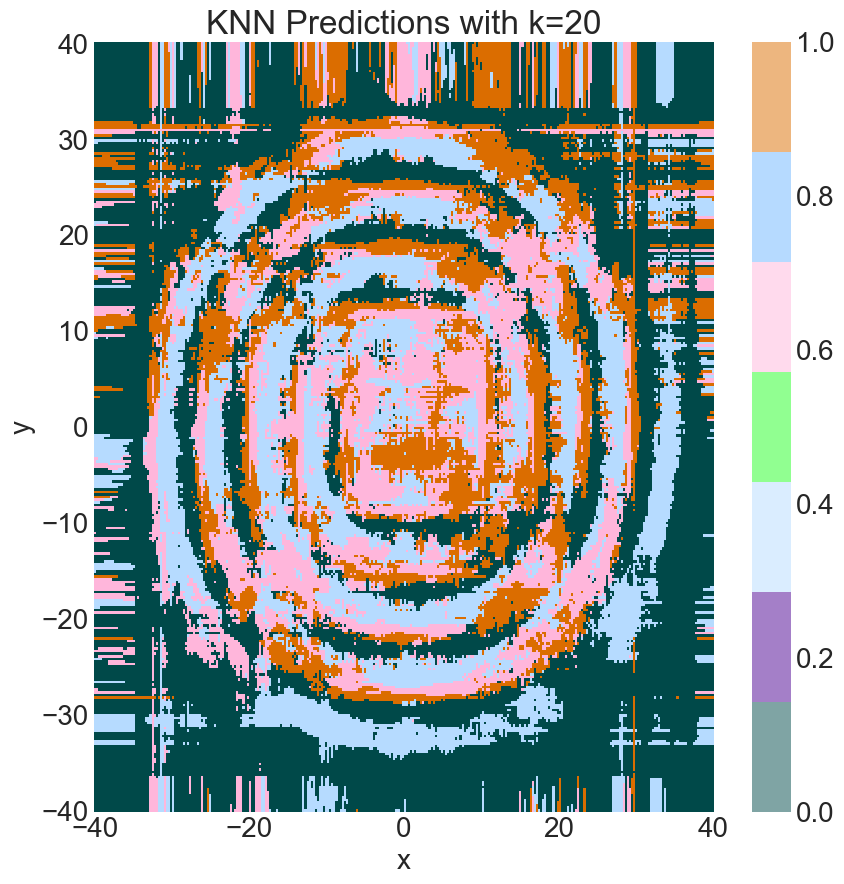

p = -5
Real P: 0.2


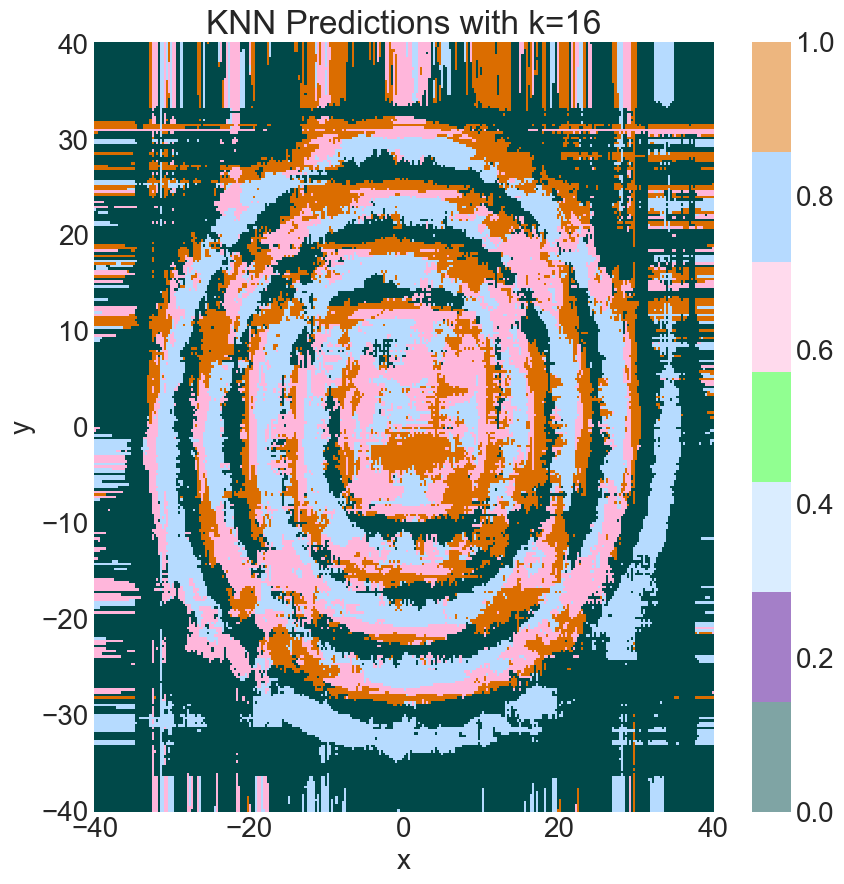

p = -4
Real P: 0.25


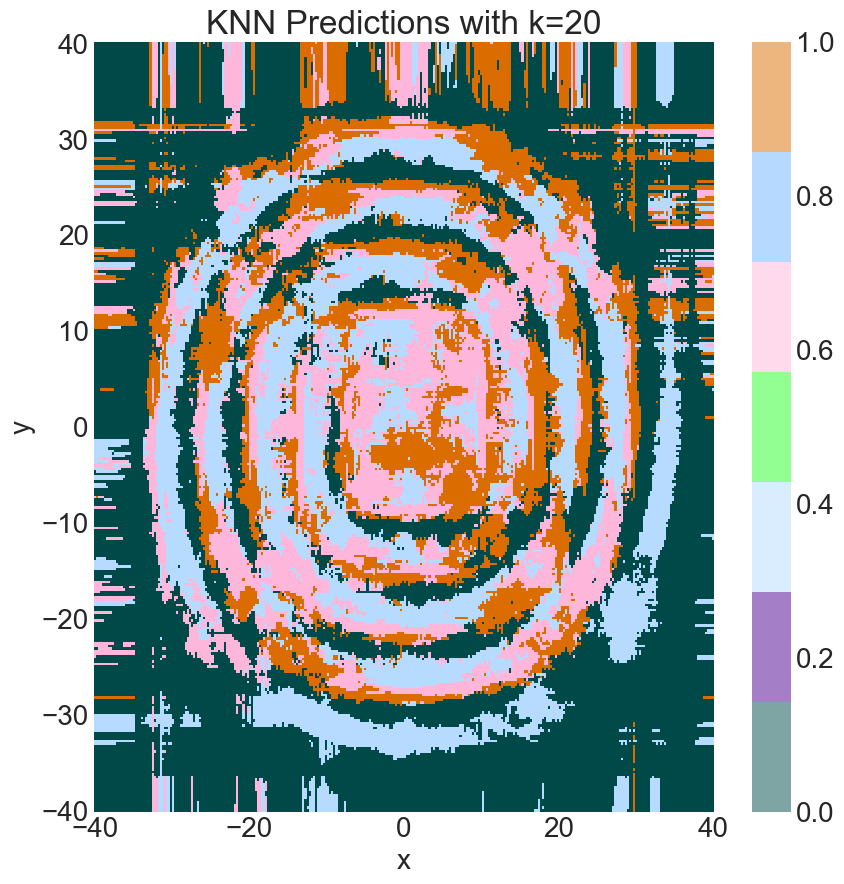

p = -3
Real P: 0.3333333333333333


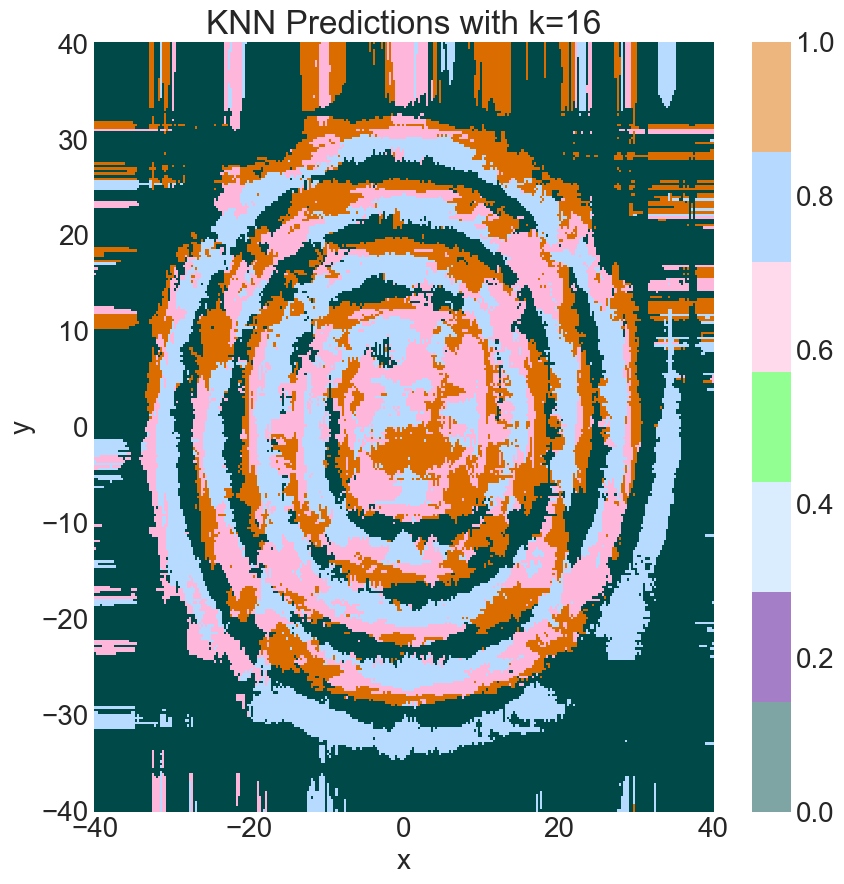

p = -2
Real P: 0.5


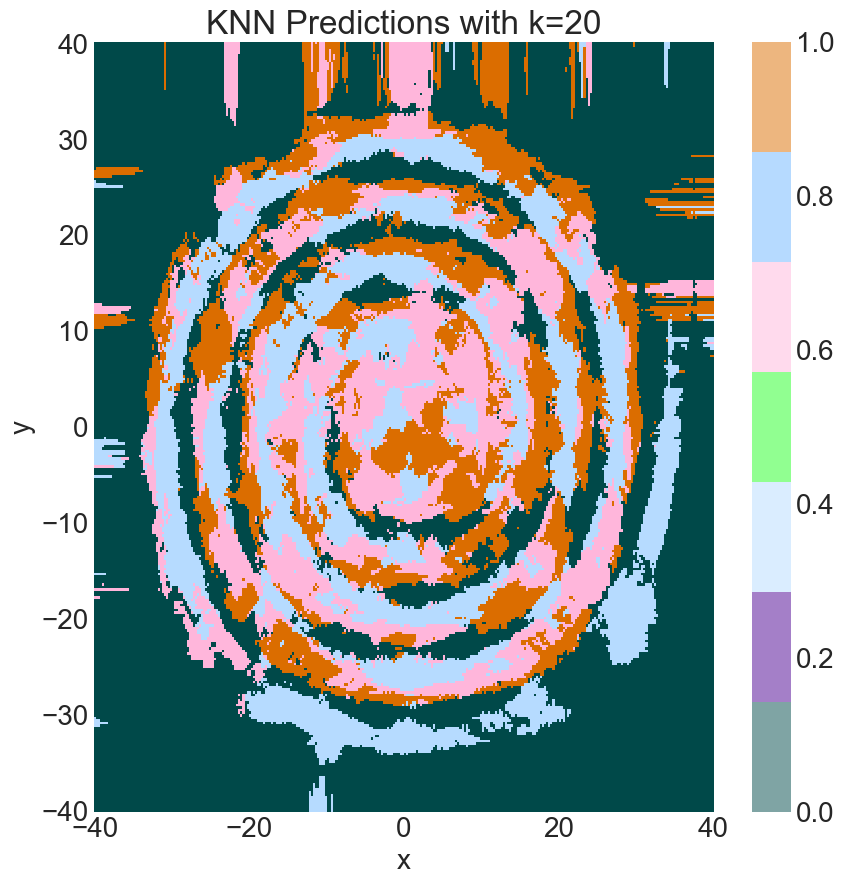

p = -1
Real P: 1.0


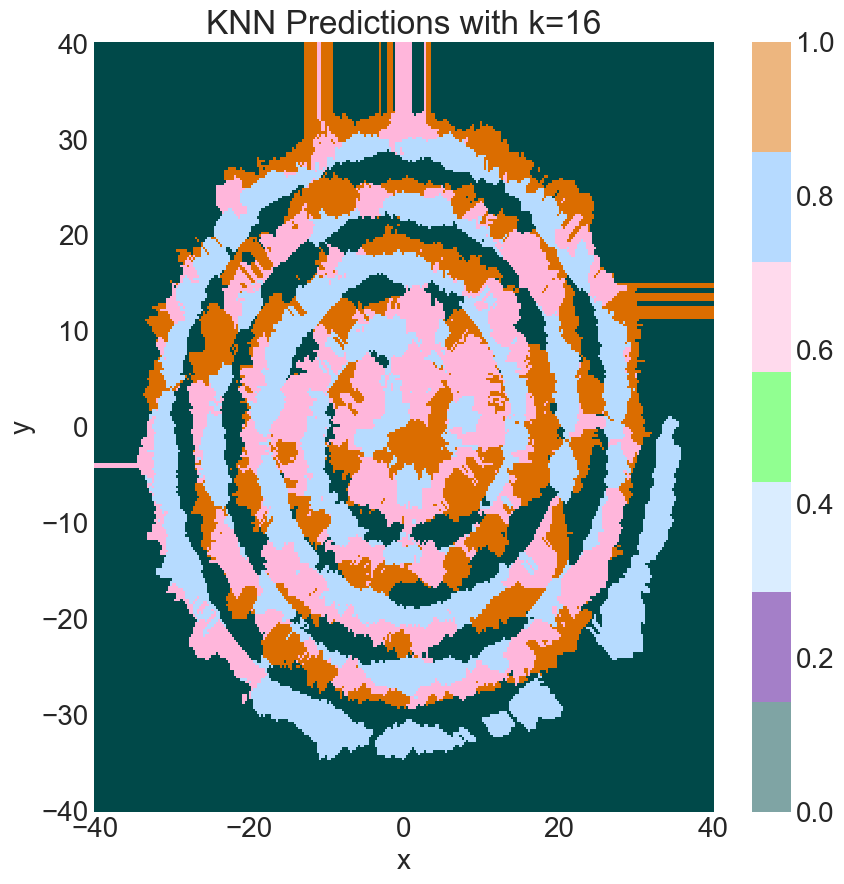

p = 0
Real P: inf


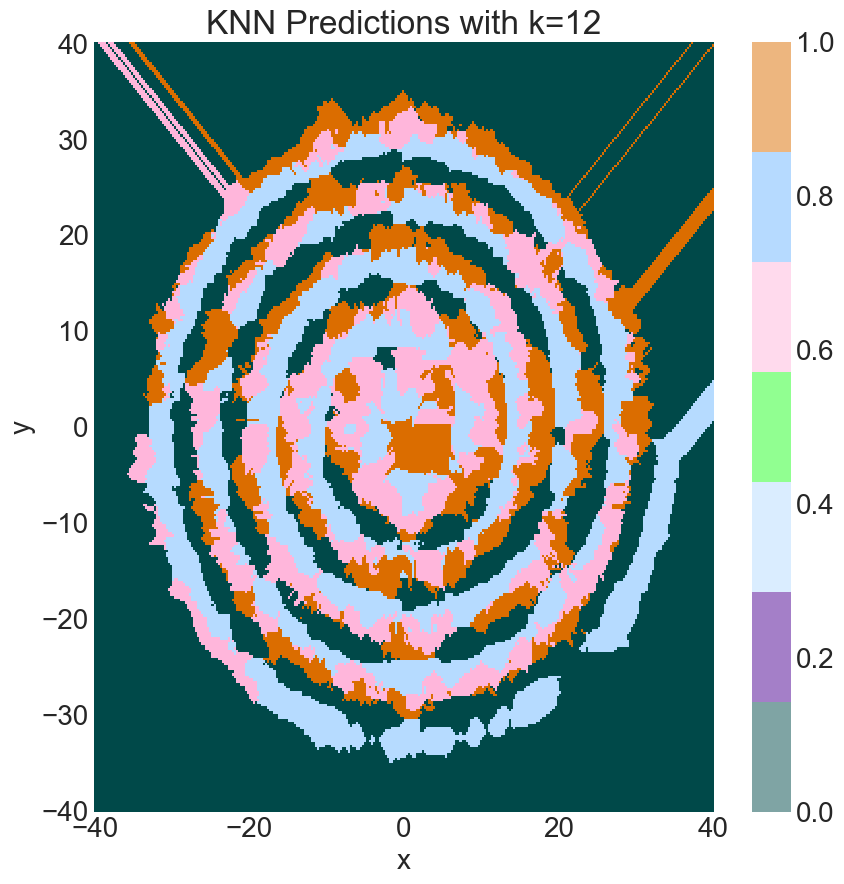

p = 1
Real P: 1.0


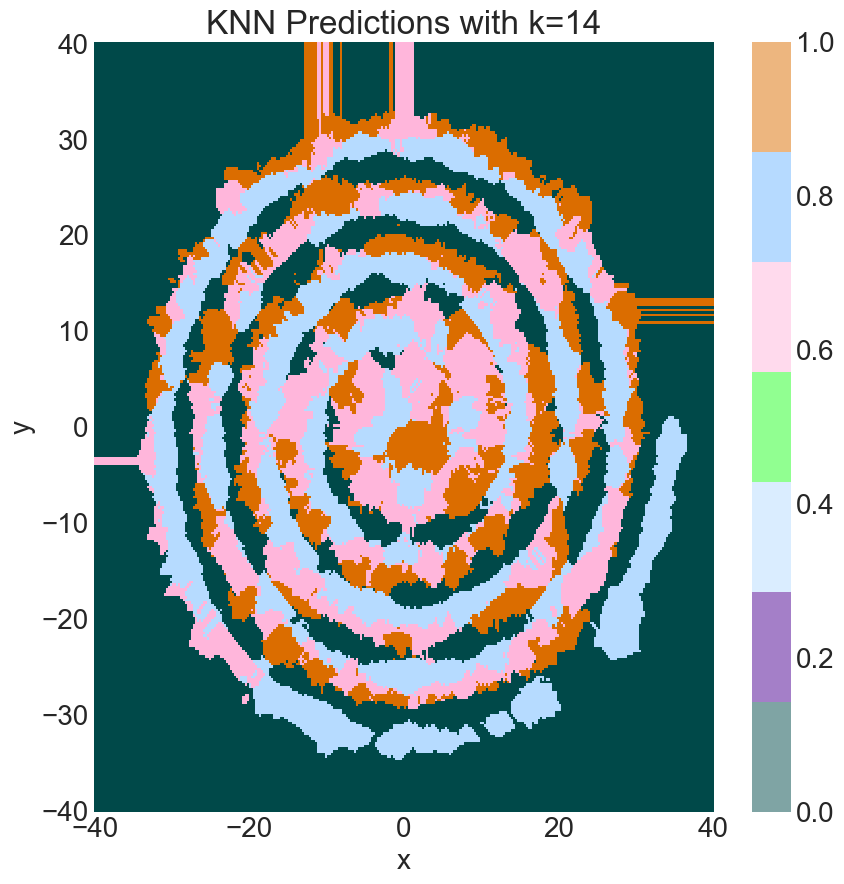

p = 2
Real P: 2.0


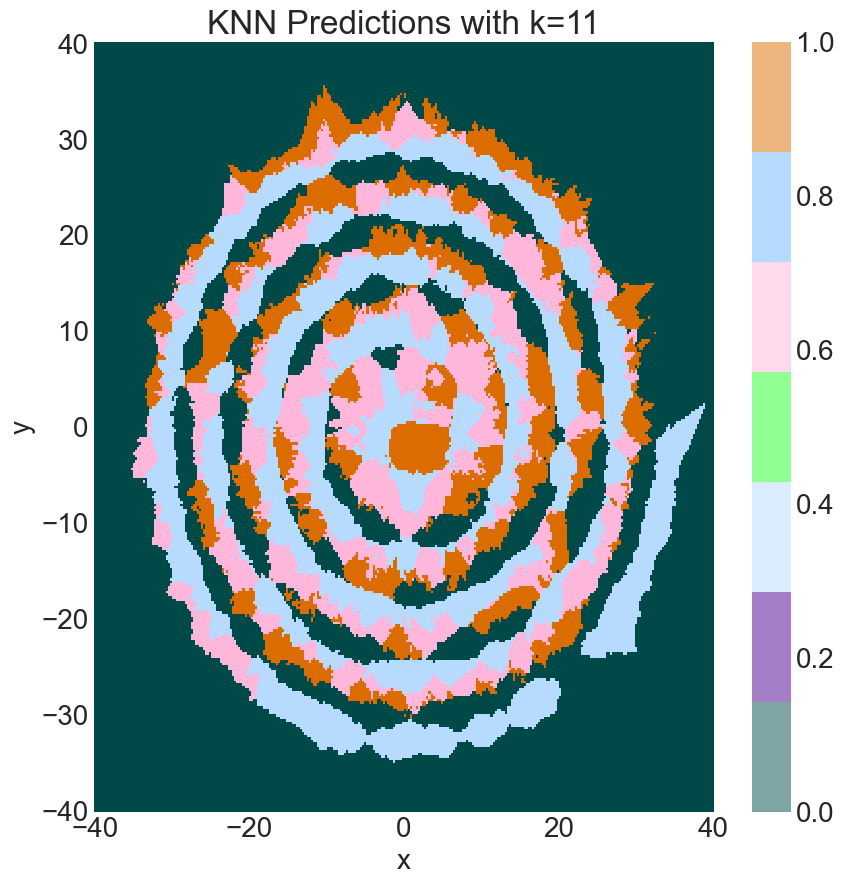

p = 3
Real P: 3.0


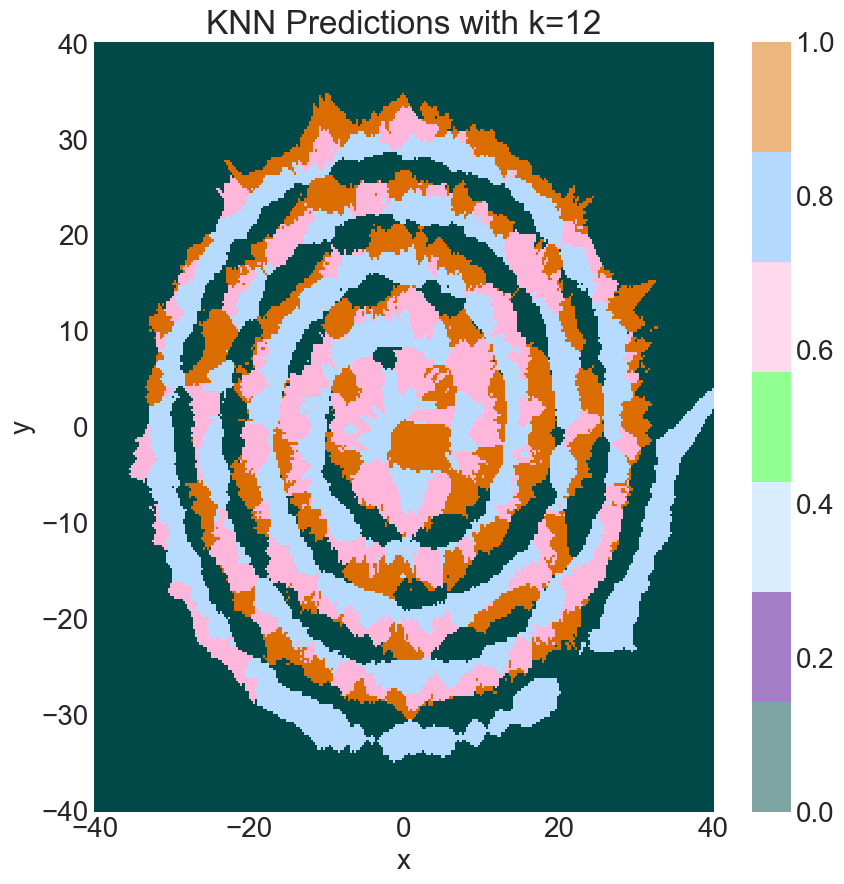

p = 4
Real P: 4.0


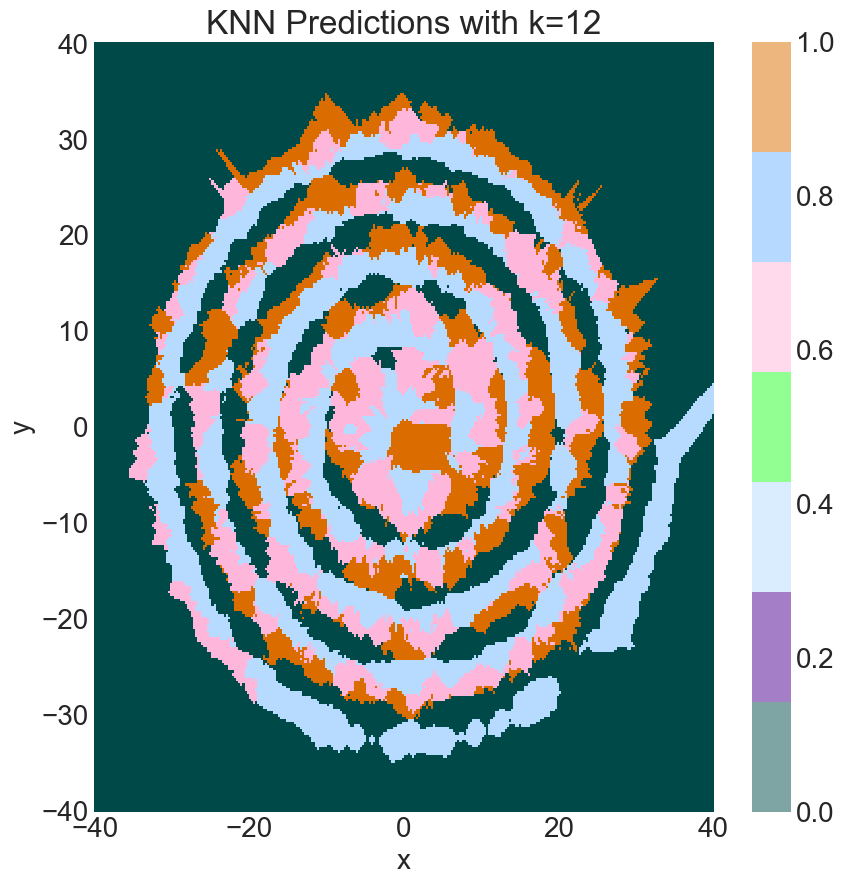

p = 5
Real P: 5.0


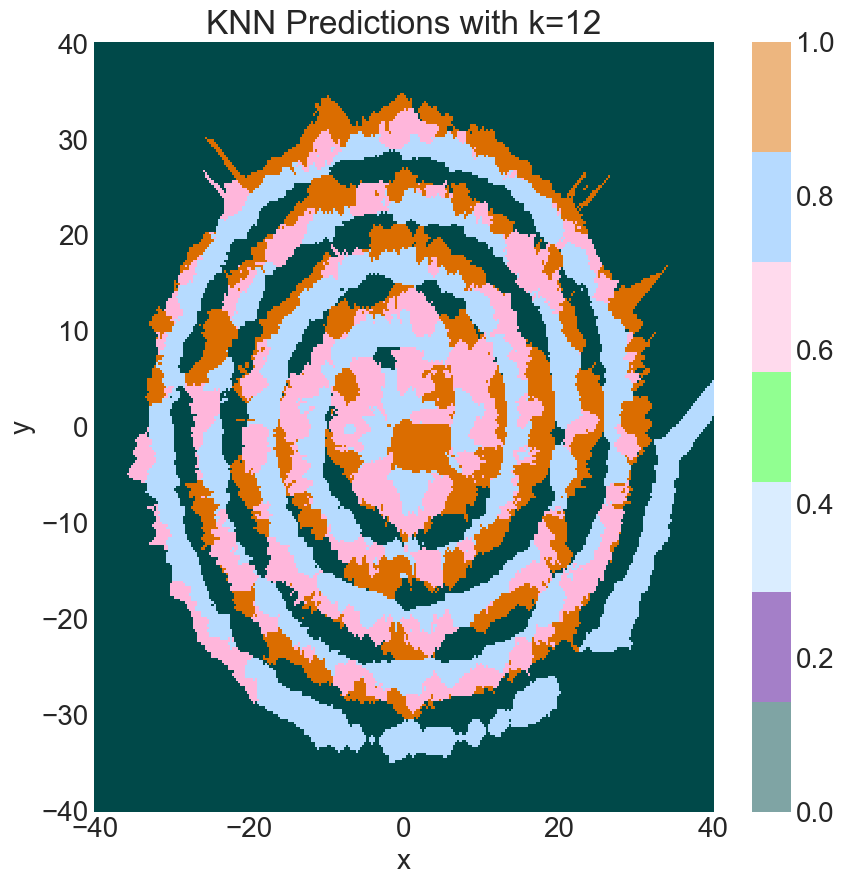

p = 6
Real P: 6.0


RecursionError: maximum recursion depth exceeded while calling a Python object

In [95]:
def re_p_spond(p_s):
    int(p_s)
    k_choices = {4: 12, 3: 12, 2: 11, 1: 14, 0: 12, -1: 16}
    if p_s in k_choices.keys():
        k_choose = k_choices[p_s]
    else:
        if p_s > 0:
            mod = -1
        else:
            mod = 1
        p_s += mod
        if p_s in k_choices.keys():
            k_choose = 2 * k_choices[p_s] - k_choices[p_s + mod]
        else:
            k_choose = re_p_spond(p_s + mod)
    return k_choose

# Visualize KNN boundary 1
# Spiral 1
classifier = KNN(num_classes=4)
classifier.train(spiral_1_train, spiral_1_train_y)
for p in range(-6, 7):
    p_spond = p
    print(f'p = {p}')
    if p < 0:
        p = float(1.0 / -float(p))
    elif p == 0:
        p = np.inf
    else:
        p = float(p)
    print(f"Real P: {p}")
    k = re_p_spond(p_spond)
            
    fig, ax = classifier.plot_predictions(k, 300, analysis.Analysis.lp_norm, p)
    plt.show()
    


In [84]:
# Visualize KNN boundary 2

# Spiral 2
classifier = KNN(num_classes=4)
classifier.train(spiral_2_train, spiral_2_train_y)
for p in range(-6, 7):
    p_spond = p
    print(f'p = {p}')
    if p < 0:
        p = float(1.0 / -float(p))
    elif p == 0:
        p = np.inf
    else:
        p = float(p)
    print(f"Real P: {p}")
    re_p_spond(p_spond)
    
    fig, ax = classifier.plot_predictions(k, 300, analysis.Analysis.lp_norm, p)
    fig.show()

### 1g. Questions

**Question 6:** Why could visualizing the class boundaries be useful?

**Answer 6:** Visualizing class boundaries can help in understanding the topology of the data to help mprevent against adversarial attacks on the classifer. It can also help in understanding the data and the classifier performance. T